In [128]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv("banana_quality_dataset.csv")

In [130]:
df

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Burro,Ecuador,3.50,Good,4.94,Ripe,21.06,2.49,27.95,196.35,2023-10-04,12.4,409.7,2029.9,173.0
996,997,Cavendish,Philippines,2.38,Processing,6.74,Overripe,16.10,2.00,12.39,165.55,2023-09-23,14.0,314.3,1330.7,180.5
997,998,Plantain,Ecuador,1.68,Processing,1.41,Green,17.17,2.28,16.56,210.08,2023-10-19,18.4,683.0,2955.4,189.9
998,999,Fehi,Guatemala,2.02,Processing,1.34,Green,17.03,2.88,26.31,162.50,2023-09-22,8.2,1362.7,1215.8,85.5


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [132]:
df.isnull().sum()

sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64

In [133]:
df.duplicated().sum()

np.int64(0)

<Axes: >

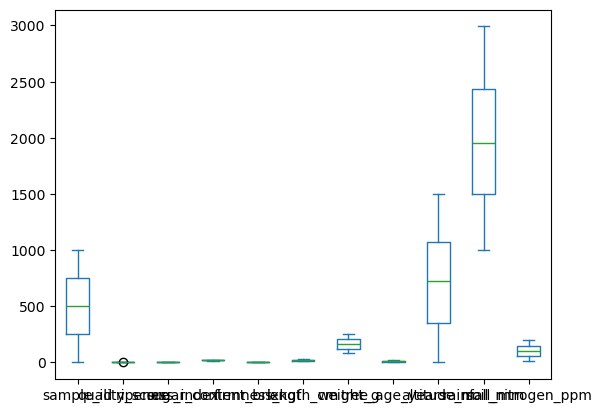

In [134]:
df.plot(kind = 'box')

In [135]:
df.columns

Index(['sample_id', 'variety', 'region', 'quality_score', 'quality_category',
       'ripeness_index', 'ripeness_category', 'sugar_content_brix',
       'firmness_kgf', 'length_cm', 'weight_g', 'harvest_date',
       'tree_age_years', 'altitude_m', 'rainfall_mm', 'soil_nitrogen_ppm'],
      dtype='object')

In [136]:
df = df.drop(columns = ['sample_id','harvest_date'])

In [137]:
df

,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,13.7,58.2,2440.5,183.6
1,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,5.1,280.2,2374.6,109.8
2,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,17.7,1246.9,1191.5,147.7
3,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,13.0,1150.2,2845.1,92.8
4,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,4.8,526.0,2136.9,129.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Burro,Ecuador,3.50,Good,4.94,Ripe,21.06,2.49,27.95,196.35,12.4,409.7,2029.9,173.0
996,Cavendish,Philippines,2.38,Processing,6.74,Overripe,16.10,2.00,12.39,165.55,14.0,314.3,1330.7,180.5
997,Plantain,Ecuador,1.68,Processing,1.41,Green,17.17,2.28,16.56,210.08,18.4,683.0,2955.4,189.9
998,Fehi,Guatemala,2.02,Processing,1.34,Green,17.03,2.88,26.31,162.50,8.2,1362.7,1215.8,85.5


In [138]:
df.shape

(1000, 14)

In [139]:
y = df[['quality_category']]
y

,quality_category
0,Processing
1,Processing
2,Premium
3,Processing
4,Processing
...,...
995,Good
996,Processing
997,Processing
998,Processing


In [140]:
y['quality_category'].unique()

array(['Processing', 'Premium', 'Good', 'Unripe'], dtype=object)

In [141]:
X = df.drop(columns = ["quality_category"])

In [142]:
X

,variety,region,quality_score,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,Manzano,Colombia,1.88,2.11,Turning,16.83,3.53,21.44,146.92,13.7,58.2,2440.5,183.6
1,Plantain,Guatemala,2.42,4.25,Ripe,16.73,4.09,26.11,160.48,5.1,280.2,2374.6,109.8
2,Burro,Ecuador,3.57,6.24,Overripe,21.34,1.63,25.20,225.27,17.7,1246.9,1191.5,147.7
3,Manzano,Ecuador,2.21,5.39,Ripe,16.75,3.31,13.08,137.80,13.0,1150.2,2845.1,92.8
4,Red Dacca,Ecuador,2.35,5.84,Ripe,16.90,3.07,12.98,227.84,4.8,526.0,2136.9,129.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Burro,Ecuador,3.50,4.94,Ripe,21.06,2.49,27.95,196.35,12.4,409.7,2029.9,173.0
996,Cavendish,Philippines,2.38,6.74,Overripe,16.10,2.00,12.39,165.55,14.0,314.3,1330.7,180.5
997,Plantain,Ecuador,1.68,1.41,Green,17.17,2.28,16.56,210.08,18.4,683.0,2955.4,189.9
998,Fehi,Guatemala,2.02,1.34,Green,17.03,2.88,26.31,162.50,8.2,1362.7,1215.8,85.5


In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   variety             1000 non-null   object 
 1   region              1000 non-null   object 
 2   quality_score       1000 non-null   float64
 3   ripeness_index      1000 non-null   float64
 4   ripeness_category   1000 non-null   object 
 5   sugar_content_brix  1000 non-null   float64
 6   firmness_kgf        1000 non-null   float64
 7   length_cm           1000 non-null   float64
 8   weight_g            1000 non-null   float64
 9   tree_age_years      1000 non-null   float64
 10  altitude_m          1000 non-null   float64
 11  rainfall_mm         1000 non-null   float64
 12  soil_nitrogen_ppm   1000 non-null   float64
dtypes: float64(10), object(3)
memory usage: 101.7+ KB


### Spliting data into Train and Test Data

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 13)
(800, 1)
(200, 13)
(200, 1)


In [145]:
# lets us use column transformer to apply feature scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
transformer = ColumnTransformer(transformers=[("t1",OrdinalEncoder(),[0,1,4]),
                                              ("t2",StandardScaler(),[2,3,5,6,7,8,9,10,11,12])])
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)

In [146]:
X_train_trans = pd.DataFrame(X_train_trans)
X_train_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.0,5.0,3.0,0.628201,-0.154192,1.652382,-1.679441,0.216699,0.324638,0.046759,1.372804,-0.640235,0.727333
1,2.0,7.0,3.0,0.196173,-0.040816,0.786801,0.848955,-0.597722,-1.469633,1.516333,0.496248,1.702812,-0.600593
2,1.0,4.0,0.0,0.402795,-1.287958,1.568297,-0.024772,0.644972,-1.654211,1.401820,0.109260,-0.170695,1.036807
3,5.0,0.0,3.0,0.722120,-0.188205,1.039056,0.624724,0.322012,-0.986419,-1.270131,-1.082201,0.976412,1.605114
4,6.0,5.0,1.0,0.646985,1.433080,0.890670,1.529380,-1.592931,0.353255,-1.136534,-0.346577,1.546836,0.847371


In [147]:
X_test_trans = pd.DataFrame(X_test_trans)
X_test_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,6.0,1.0,1.849149,1.336710,-0.014480,-0.117557,1.766557,0.474263,1.592674,1.135066,1.217711,0.339083
1,6.0,3.0,2.0,-0.104368,0.588424,-0.182650,-1.346960,-0.764468,-0.924484,0.180357,0.534831,0.348392,0.967410
2,6.0,1.0,2.0,0.534282,0.441035,0.999486,1.158239,-0.710056,-1.373154,-0.602143,-1.629067,0.611871,1.590109
3,3.0,6.0,3.0,-0.761801,-0.290244,-1.513172,-0.388180,0.462430,1.650003,-0.125009,1.603610,0.153958,-1.172652
4,3.0,0.0,2.0,0.402795,0.361671,-1.063069,-0.102093,1.445352,1.101788,1.077369,1.528754,0.874455,-1.000097


In [156]:
### model building
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=9,weights="uniform",metric = "minkowski",p = 2)
kn.fit(X_train_trans,y_train)

KNeighborsClassifier(n_neighbors=9)

In [157]:
y_pred = kn.predict(X_test_trans)

In [158]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print(score)

0.84


In [159]:
y_train_pred = kn.predict(X_train_trans)
train = accuracy_score(y_train_pred,y_train)
train

0.885

In [160]:
import pickle


with open("Banana.pkl", "wb") as file:
    pickle.dump(kn, file)

print("Model saved successfully as model.pkl")


Model saved successfully as model.pkl
